<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Quiz 2

This notebook contains 5 parts. You are to fill in this quiz with your answers, taking special care to follow the directions _exactly_.

To **submit** your quiz, add it to your submissions folder and submit via Google Classroom as any other assignment.

### Quiz Information:
- This is an "open book" quiz - you may use any resources! This includes Jupyter notebooks, Google, StackOverflow, and your notes. ANY RESOURCE YOU USE MUST BE CITED (comment your code with links, which lesson you got the inspiration from, etc.) and failure to cite resources you use will be considered plagiarism. 
- You may NOT work with anyone else on this quiz (your classmates, your instructor, etc.).
- You will have one hour to take this quiz.

## Part 1: Getting the data
The dataset provided in this repository (`./data/concrete.csv`) consists of various amounts of different components used to create concrete and the concrete's [compressive strength](https://www.aboutcivil.org/compressive-strength-of-concrete.html). A data dictionary for this dataset can be found in the README.

**Read in the data and display the first 5 rows.**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
con=pd.read_csv('./data/concrete.csv')
con.head()

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30


## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `Unnamed: 0` column should not be a part of this dataset.
- Any null values in this datset are clerical errors. They should all be 0's.
- All columns in this dataset should be numeric.

**Please clean up the dataset.**

In [8]:
con.drop(columns= 'Unnamed: 0', inplace=True)
con.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30


In [10]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               651 non-null    float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   object 
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.5+ KB


In [18]:
con['Superplasticizer'].unique()
con['Superplasticizer']=con['Superplasticizer'].replace(np.NaN, '0').astype(float)
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   object 
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.5+ KB


In [43]:
# con['Age']=con['Age'].astype(float)
con['Age'].iloc[434]=28

In [46]:
con['Age']=pd.to_numeric(con['Age'])

In [47]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the Water column
- A scatterplot of Coarse Aggregate compared to Fine Aggregate colored purple with a title and axis labels

**Please display these.**

In [50]:
con['Water'].describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: Water, dtype: float64

In [65]:
con.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

Text(0, 0.5, 'Fine Aggregate')

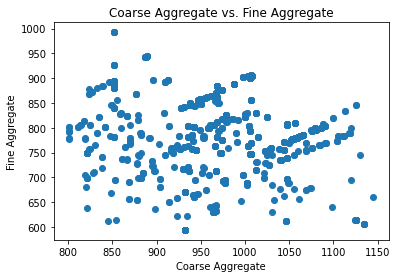

In [77]:
#https://git.generalassemb.ly/DSIR-Lancelot/2.03-lesson-data-visualization/blob/master/solution-code/solution-code.ipynb
plt.scatter(con['Coarse Aggregate'], con['Fine Aggregate'], cmap='purple')
plt.title('Coarse Aggregate vs. Fine Aggregate')
plt.xlabel('Coarse Aggregate')
plt.ylabel('Fine Aggregate')

## Part 4: Modeling

**Fit a linear regression model to predict the concrete compressive strength.** 
* Please use a random state of `2020` when splitting your data
* Use 80% of the dataset for training and the other 20% for testing
* Print out and interpret the testing R<sup>2</sup>.

In [84]:
con.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

The below cells were created with help from https://git.generalassemb.ly/DSIR-Lancelot/3.08-lesson-model-workflow/blob/master/starter-code-Adi-InClass.ipynb

In [106]:
features = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']

In [107]:
X=con[features]
y=con['Concrete compressive strength']
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2020)

In [110]:
lr=LinearRegression()
lr

LinearRegression()

In [113]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6187699710545507

In [114]:
lr.fit(X_test,y_test)
lr.score(X_test,y_test)

0.6132903049615644

In [116]:
lr.coef_

array([ 0.1284465 ,  0.11343538,  0.08939279, -0.07204768,  0.41187739,
        0.04225957,  0.0356362 ,  0.12784586])

## Part 5: Interpretation

The firm is especially interested in learning more about the effects of [superplasticizer](https://en.wikipedia.org/wiki/Superplasticizer).

**They ask you what effect the Superplasticizer has on the concrete compressive strength. How would you respond? Be as specific as possible.**

In [119]:
#https://git.generalassemb.ly/DSIR-Lancelot/3.08-lesson-model-workflow/blob/master/starter-code-Adi-InClass.ipynb
pd.DataFrame(list(zip(features, lr.coef_)), 
             columns=['Features', 'Coefficients']).sort_values(by='Coefficients',
                                                              ascending=False)

,Features,Coefficients
4,Superplasticizer,0.411877
0,Cement,0.128446
7,Age,0.127846
1,Blast Furnace Slag,0.113435
2,Fly Ash,0.089393
5,Coarse Aggregate,0.042260
6,Fine Aggregate,0.035636
3,Water,-0.072048


I would tell the team that for each unit added of superplasticizer, they can expect their concrete to have 41 more units of strength. 